<a href="https://colab.research.google.com/github/wahomeJohn/ClassGoals/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment -Decision Trees

In [2]:
#import necessary libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load data into python
df = pd.read_csv("/heart_decision.csv")
df.head()

,sex,chol,restecg,target
0,1,233,0,1
1,1,250,1,1
2,0,204,0,1
3,1,236,1,1
4,0,354,1,1


In [9]:
#selecting the features and the target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sex      50 non-null     int64
 1   chol     50 non-null     int64
 2   restecg  50 non-null     int64
 3   target   50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [11]:
df.shape


(50, 4)

In [12]:
df.describe()

,sex,chol,restecg,target
count,50.000000,50.000000,50.000000,50.000000
mean,0.740000,246.660000,0.460000,0.400000
std,0.443087,47.310787,0.503457,0.494872
min,0.000000,167.000000,0.000000,0.000000
25%,0.250000,216.750000,0.000000,0.000000
50%,1.000000,239.000000,0.000000,0.000000
75%,1.000000,275.750000,1.000000,1.000000
max,1.000000,354.000000,1.000000,1.000000


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

sex        0
chol       0
restecg    0
target     0
dtype: int64

The data does not have  null and duplicated values.

In [4]:
target = df.target
features = df.drop(columns=['target'])

In [5]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
features.head()

,sex,chol,restecg
0,1,233,0
1,1,250,1
2,0,204,0
3,1,236,1
4,0,354,1


[Text(0.5, 1.0, 'With vs without')]

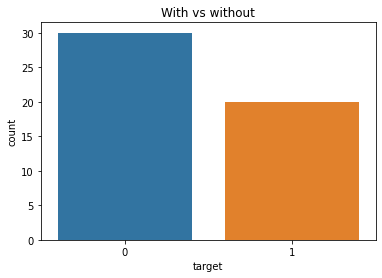

In [8]:
#Create a countplot of the target
ax = sns.countplot(x= target, data= df)
ax.set(title="With vs without")
plt.show()


(array([13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

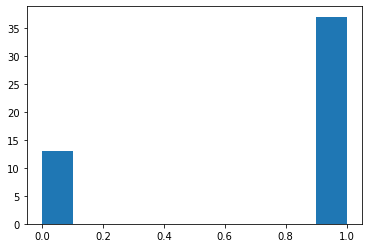

In [7]:
#Create one graph for each of the features
plt.hist(df.sex)
plt.show()

(array([ 5.,  5.,  4., 12.,  6.,  6.,  6.,  1.,  2.,  3.]),
 array([167. , 185.7, 204.4, 223.1, 241.8, 260.5, 279.2, 297.9, 316.6,
        335.3, 354. ]),
 <a list of 10 Patch objects>)

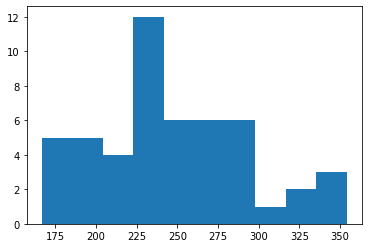

In [8]:
plt.hist(df.chol)
plt.show()

(array([27.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

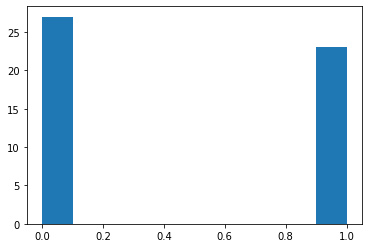

In [12]:
 plt.hist(df.restecg)
plt.show()

**Splitting the Dataset in Train-Test**

Before feeding the data into the model we first split it into train and test data using the train_test_split function

In [13]:
#Create a DecisionTreeClassifier model
from sklearn.model_selection import train_test_split
features_train, features_test,target_train,target_test = train_test_split(features,target)

In [14]:
#Fit your model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(features_train,target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
#predict your model
prediction = model.predict(features_test)
prediction

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [19]:
#Create a confusion matrix using pd.crosstab
pd.crosstab(target_test, prediction,rownames = ['Actual'],colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6,3
1,1,3


In [21]:
#Print a classification report of the data
from sklearn.metrics import classification_report
print(classification_report(target_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.50      0.75      0.60         4

    accuracy                           0.69        13
   macro avg       0.68      0.71      0.68        13
weighted avg       0.75      0.69      0.70        13



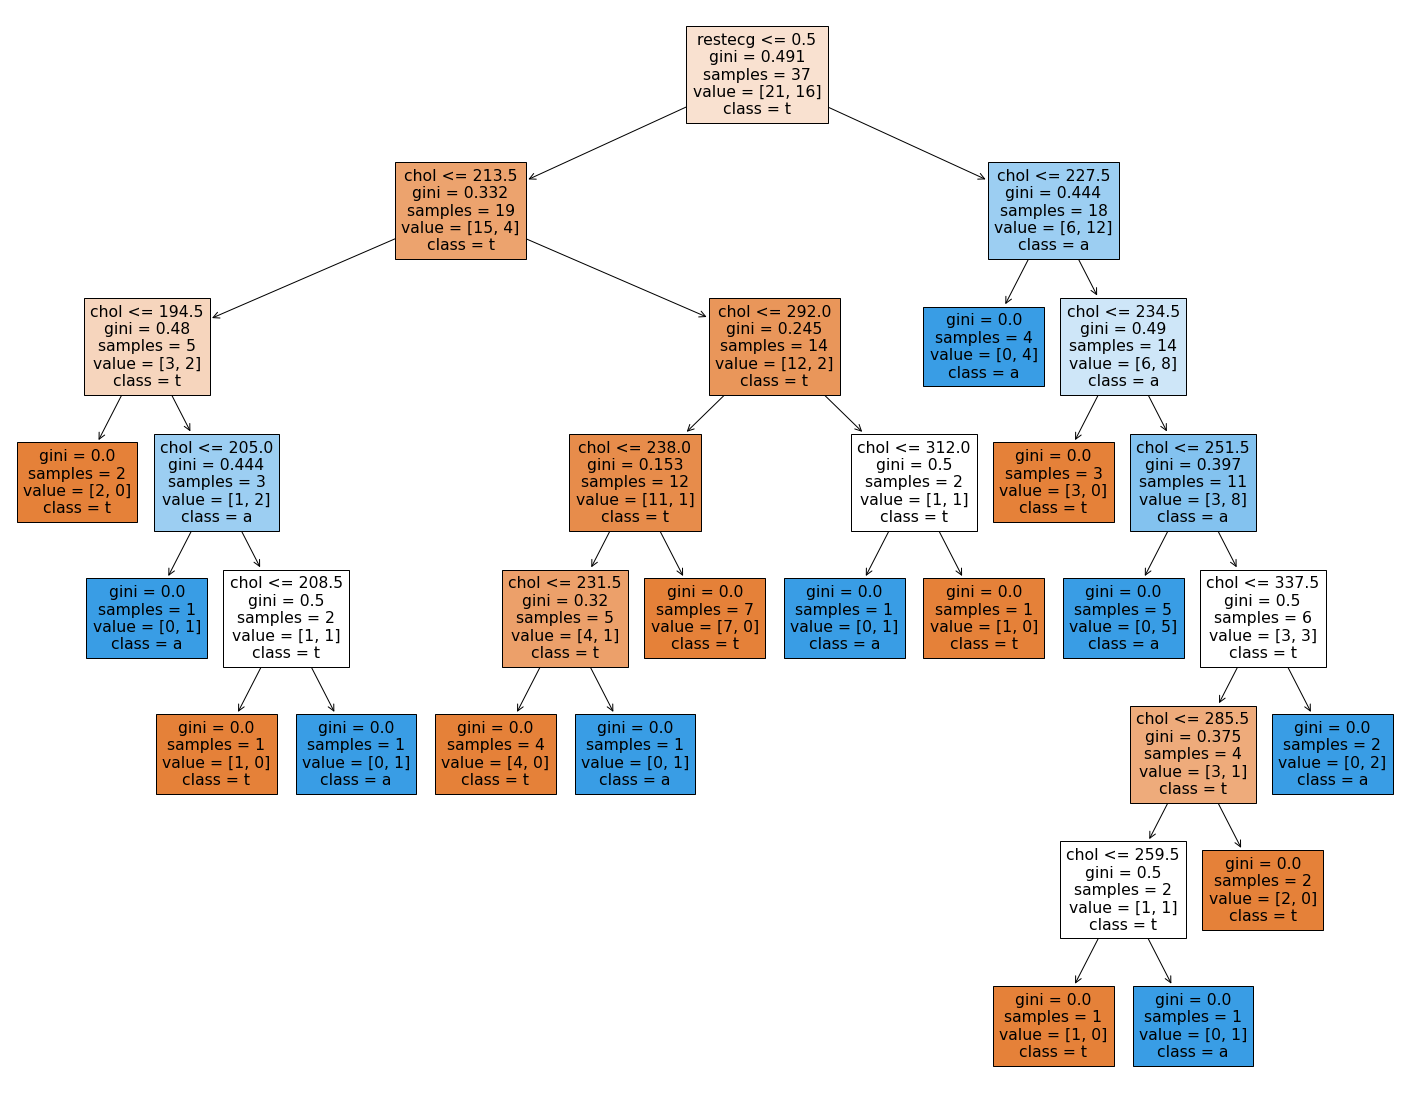

In [22]:
#Graph the decision tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree( model,
                   feature_names=features.columns,  
                   class_names="target",
                   filled=True)